# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [4]:
df1 = pd.read_csv('garisKemiskinan.csv')
df1.head()

,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0


In [5]:
df2 = pd.read_csv('minUpah.csv')
df2.head()

,provinsi,tahun,ump
0,ACEH,2002,330000.0
1,ACEH,2003,425000.0
2,ACEH,2004,550000.0
3,ACEH,2005,620000.0
4,ACEH,2006,820000.0


In [6]:
df3 = pd.read_csv ('pengeluaran.csv')
df3.head()

,provinsi,daerah,jenis,tahun,peng
0,ACEH,PERDESAAN,MAKANAN,2007,195176.0
1,ACEH,PERDESAAN,MAKANAN,2008,218781.0
2,ACEH,PERDESAAN,MAKANAN,2009,247427.0
3,ACEH,PERDESAAN,MAKANAN,2010,275749.0
4,ACEH,PERDESAAN,MAKANAN,2011,308000.0


In [7]:
df4 = pd.read_csv('rataRataUpah.csv')
df4.head()

,provinsi,tahun,upah
0,ACEH,2015,11226
1,ACEH,2016,13627
2,ACEH,2017,14809
3,ACEH,2018,13814
4,ACEH,2019,15065


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  735 non-null    object 
 1   tahun     735 non-null    int64  
 2   ump       711 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 17.4+ KB


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  4620 non-null   object 
 1   daerah    4620 non-null   object 
 2   jenis     4620 non-null   object 
 3   tahun     4620 non-null   int64  
 4   peng      4512 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.6+ KB


In [11]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   provinsi  280 non-null    object
 1   tahun     280 non-null    int64 
 2   upah      280 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.7+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [12]:
#1 Memahami Struktur Data

# Mengetahui jumlah baris dan kolom
print(f"Jumlah Baris: {df1.shape[0]} | Jumlah Kolom: {df1.shape[1]}")
print (f"Jumlah Baris: {df2.shape[0]} | Jumlah Kolom: {df2.shape[1]}")
print (f"Jumlah Baris: {df3.shape[0]} | Jumlah Kolom: {df3.shape[1]}")
print (f"Jumlah Baris: {df4.shape[0]} | Jumlah Kolom: {df4.shape[1]}")

print ('--------------------------------------')

# Mengetahui tipe data pada dataset
print (df1.dtypes)
print (df2.dtypes)
print (df3.dtypes)
print (df4.dtypes)

Jumlah Baris: 5460 | Jumlah Kolom: 6
Jumlah Baris: 735 | Jumlah Kolom: 3
Jumlah Baris: 4620 | Jumlah Kolom: 5
Jumlah Baris: 280 | Jumlah Kolom: 3
--------------------------------------
provinsi     object
jenis        object
daerah       object
tahun         int64
periode      object
gk          float64
dtype: object
provinsi     object
tahun         int64
ump         float64
dtype: object
provinsi     object
daerah       object
jenis        object
tahun         int64
peng        float64
dtype: object
provinsi    object
tahun        int64
upah         int64
dtype: object


In [13]:
#2 Menangani Data yang Hilang

# Identifikasi missing value
df1.isnull().sum()

,0
provinsi,0
jenis,0
daerah,0
tahun,0
periode,0
gk,199


In [14]:
df2.isnull().sum()

,0
provinsi,0
tahun,0
ump,24


In [15]:
df3.isnull().sum()

,0
provinsi,0
daerah,0
jenis,0
tahun,0
peng,108


In [16]:
df3.isnull().sum()

,0
provinsi,0
daerah,0
jenis,0
tahun,0
peng,108


In [17]:
df4.isnull().sum()

,0
provinsi,0
tahun,0
upah,0


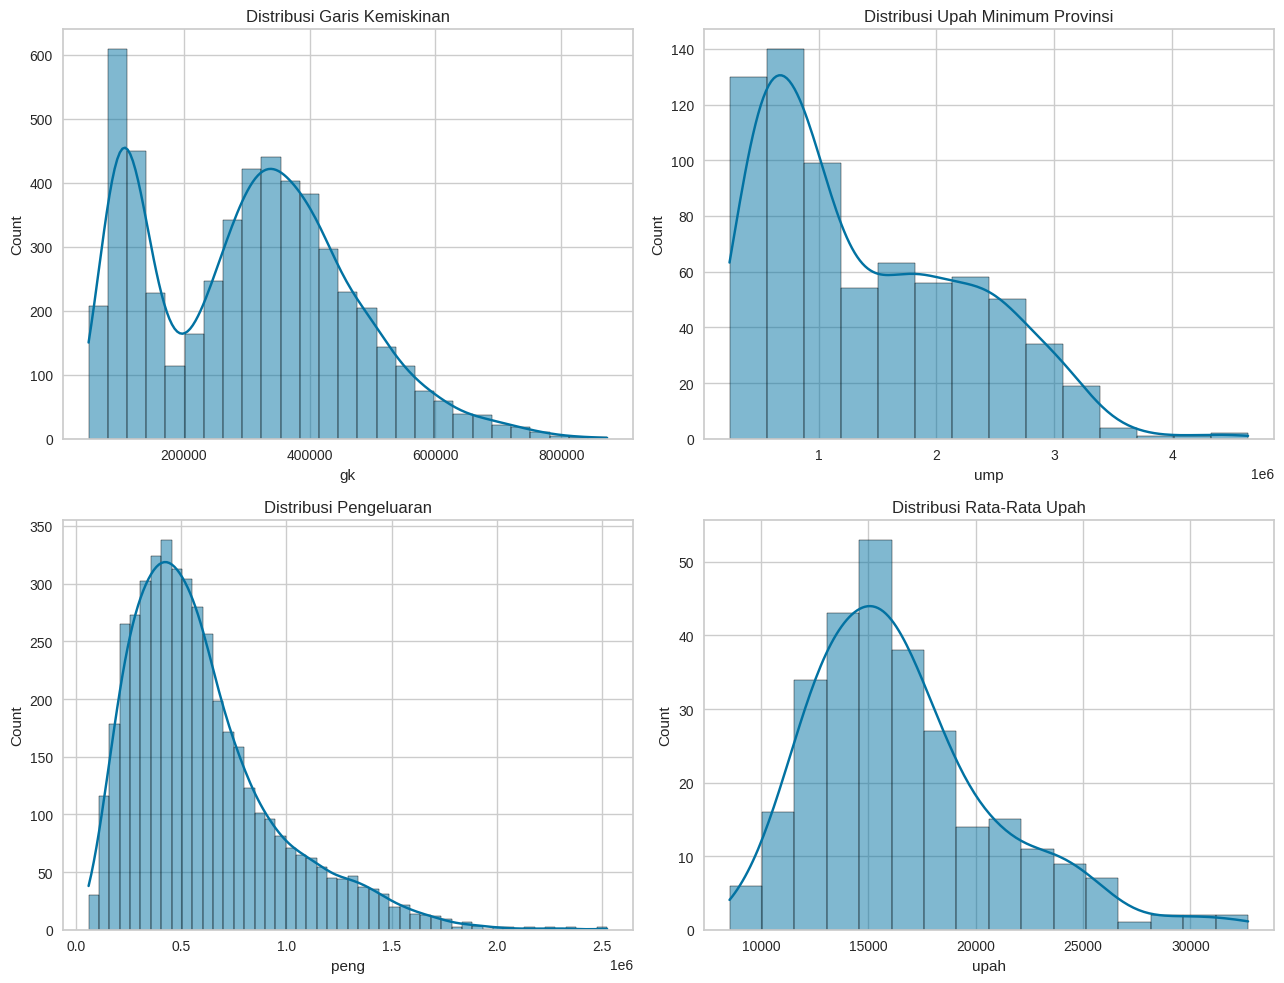

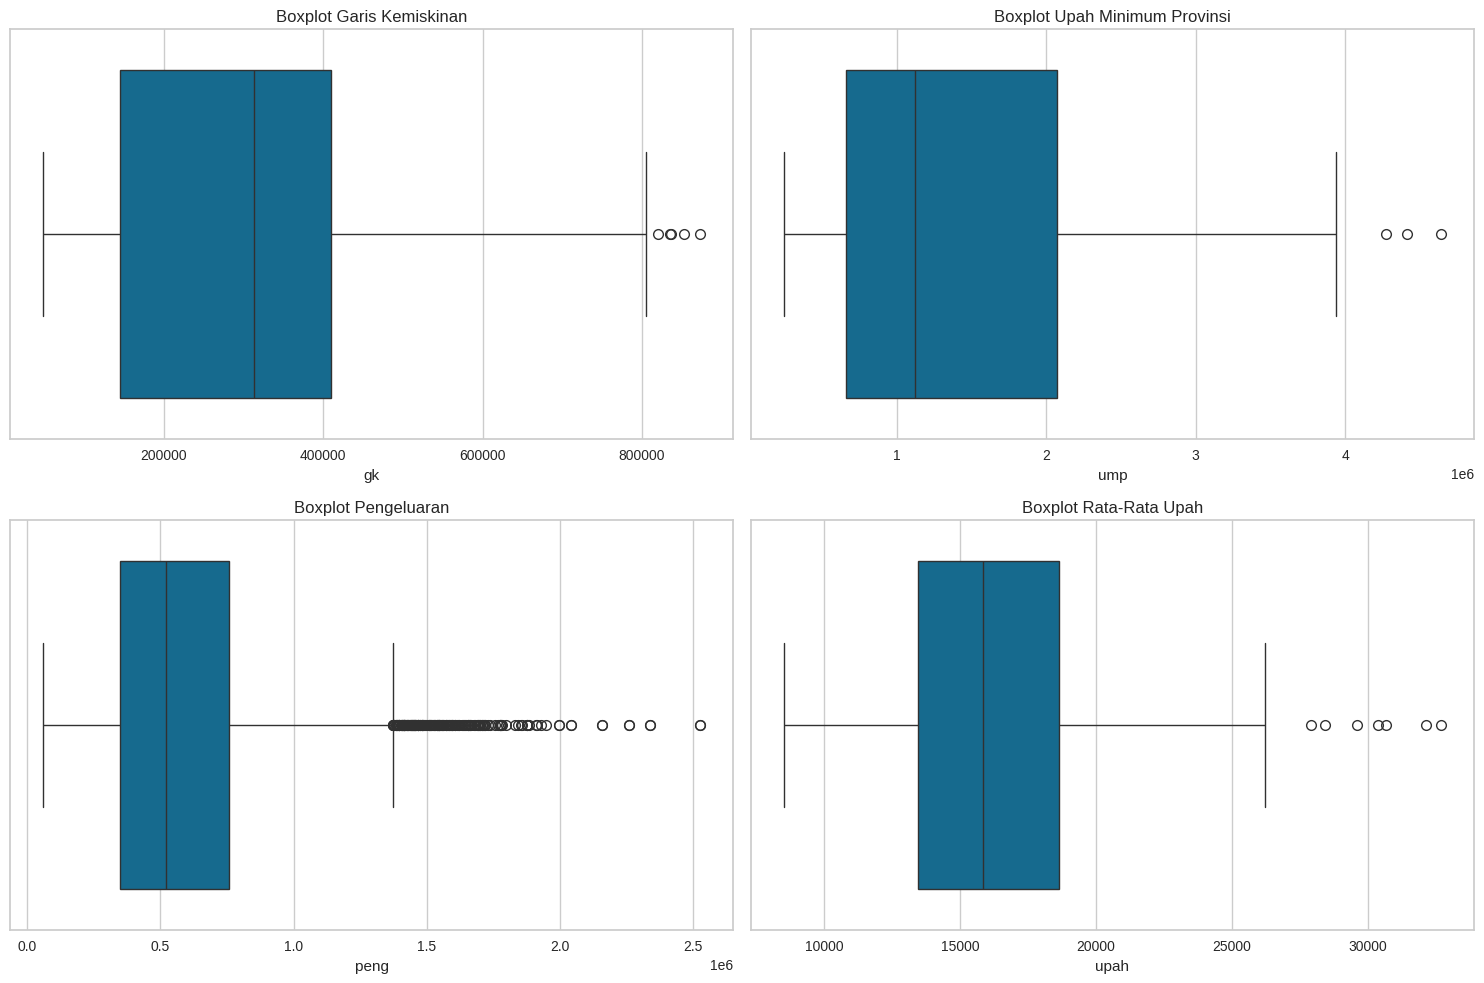

In [18]:
#3 Analisis Distribusi dan Korelasi

# Visualisasi distribusi dengan histogram
plt.figure(figsize=(13, 10))

plt.subplot(2, 2, 1)
sns.histplot(df1['gk'], kde=True)
plt.title('Distribusi Garis Kemiskinan')

plt.subplot(2, 2, 2)
sns.histplot(df2['ump'], kde=True)
plt.title('Distribusi Upah Minimum Provinsi')

plt.subplot(2, 2, 3)
sns.histplot(df3['peng'], kde=True)
plt.title('Distribusi Pengeluaran')

plt.subplot(2, 2, 4)
sns.histplot(df4['upah'], kde=True)
plt.title('Distribusi Rata-Rata Upah')

plt.tight_layout()
plt.show()

# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x=df1['gk'])
plt.title('Boxplot Garis Kemiskinan')

plt.subplot(2, 2, 2)
sns.boxplot(x=df2['ump'])
plt.title('Boxplot Upah Minimum Provinsi')

plt.subplot(2, 2, 3)
sns.boxplot(x=df3['peng'])
plt.title('Boxplot Pengeluaran')

plt.subplot(2, 2, 4)
sns.boxplot(x=df4['upah'])
plt.title('Boxplot Rata-Rata Upah')

plt.tight_layout()
plt.show()

Matriks Korelasi antara Garis Kemiskinan dan Upah Minimum Provinsi:
           gk       ump
gk   1.000000  0.264894
ump  0.264894  1.000000


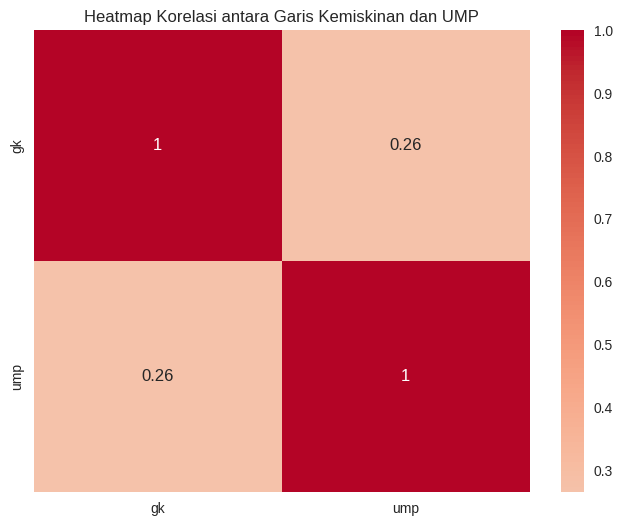

In [19]:
# Menggabungkan data yang relevan untuk analisis korelasi
# Menggabungkan berdasarkan kolom yang sama
df_merged = pd.merge(df1, df2, on=['provinsi', 'tahun'], how='inner')

# Hitung matriks korelasi
corr_matrix = df_merged[['gk', 'ump']].corr()
print("Matriks Korelasi antara Garis Kemiskinan dan Upah Minimum Provinsi:")
print(corr_matrix)

# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi antara Garis Kemiskinan dan UMP')
plt.show()


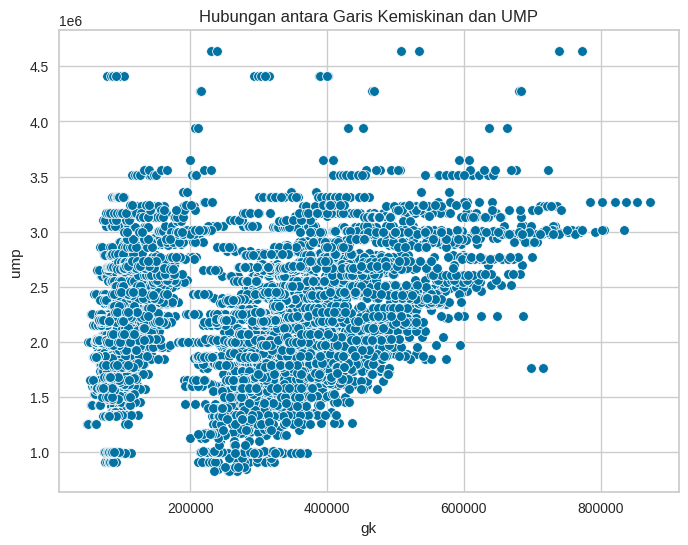

In [20]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='gk', y='ump', data=df_merged)
plt.title('Hubungan antara Garis Kemiskinan dan UMP')
plt.xlabel('gk')
plt.ylabel('ump ')
plt.show()

<ipython-input-21-880bbe9fb1f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='daerah', y='gk', data=df1, palette='pastel')


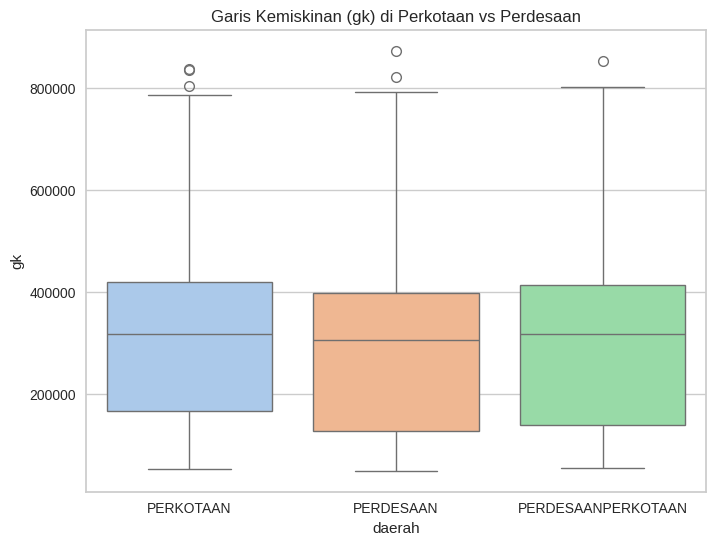

<ipython-input-21-880bbe9fb1f6>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='jenis', y='gk', data=df1, ci=None, palette='muted')
<ipython-input-21-880bbe9fb1f6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='jenis', y='gk', data=df1, ci=None, palette='muted')


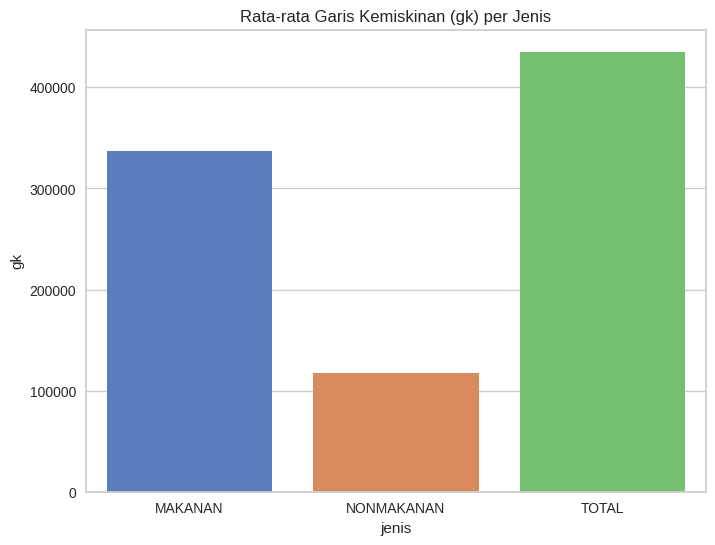

In [21]:
# Membandingkan 'gk' antara daerah PERKOTAAN vs PERDESAAN
plt.figure(figsize=(8, 6))
sns.boxplot(x='daerah', y='gk', data=df1, palette='pastel')
plt.title('Garis Kemiskinan (gk) di Perkotaan vs Perdesaan')
plt.show()

# Bandingkan 'gk' berdasarkan jenis (MAKANAN/NONMAKANAN/TOTAL)
plt.figure(figsize=(8, 6))
sns.barplot(x='jenis', y='gk', data=df1, ci=None, palette='muted')
plt.title('Rata-rata Garis Kemiskinan (gk) per Jenis')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [22]:
#! Menghapus Missing Value
# Mengatasi missing value menggunakan metode interpolate dan imputation
df1['gk'].fillna(df1['gk'].mean(), inplace=True)
df1['gk'].interpolate(method='linear', inplace=True)

df2['ump'].fillna(df2['ump'].mean(), inplace=True)
df2['ump'].interpolate(method='linear', inplace=True)

df3['peng'].fillna(df3['peng'].mean(), inplace=True)
df3['peng'].interpolate(method='linear', inplace=True)

<ipython-input-22-6f488fe9a295>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gk'].fillna(df1['gk'].mean(), inplace=True)
<ipython-input-22-6f488fe9a295>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [23]:
# Identifikasi missing value
print(df1.isna().sum())
print("----------------")
print(df2.isna().sum())
print("----------------")
print(df3.isna().sum())
print("----------------")
print(df4.isna().sum())

provinsi    0
jenis       0
daerah      0
tahun       0
periode     0
gk          0
dtype: int64
----------------
provinsi    0
tahun       0
ump         0
dtype: int64
----------------
provinsi    0
daerah      0
jenis       0
tahun       0
peng        0
dtype: int64
----------------
provinsi    0
tahun       0
upah        0
dtype: int64


In [24]:
#2 Menghapus data duplikat

print("Jumlah duplikasi: ", df1.duplicated().sum())
print("Jumlah duplikasi: ", df2.duplicated().sum())
print("Jumlah duplikasi: ", df3.duplicated().sum())
print("Jumlah duplikasi: ", df4.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0
Jumlah duplikasi:  0
Jumlah duplikasi:  0


Tidak ada duplikasi data

In [25]:
#3 Normalisasi atau Standarisasi Fitur
# Gabungkan df1, df2, df3, dan df4 berdasarkan kunci yang sama ('provinsi' dan 'tahun')
df_merged = pd.merge(df1, df2, on=['provinsi', 'tahun'], how='inner')
df_merged = pd.merge(df_merged, df3, on=['provinsi', 'tahun'], how='inner')
df_merged = pd.merge(df_merged, df4, on=['provinsi', 'tahun'], how='inner')

numerical_cols = ['gk', 'ump', 'peng', 'upah']
data_numerik = df_merged[numerical_cols]

# Cek kolom yang tersedia setelah merge
print("Kolom setelah merge:", df_merged.columns.tolist())


Kolom setelah merge: ['provinsi', 'jenis_x', 'daerah_x', 'tahun', 'periode', 'gk', 'ump', 'daerah_y', 'jenis_y', 'peng', 'upah']


In [26]:
# Inisialisasi scaler
scaler = StandardScaler()

# Standarisasi data
data_standardized = scaler.fit_transform(data_numerik)

# Konversi ke DataFrame
df_standardized = pd.DataFrame(data_standardized, columns=numerical_cols)
print(df_standardized.head())

         gk       ump      peng      upah
0 -0.060797 -0.683252 -1.027294 -1.236257
1 -0.060797 -0.683252 -1.409232 -1.236257
2 -0.060797 -0.683252 -0.290936 -1.236257
3 -0.060797 -0.683252 -0.825734 -1.236257
4 -0.060797 -0.683252 -0.645764 -1.236257


In [27]:
# Menambahkan kolom hasil scalling ke df utama
df_merged[numerical_cols] = df_standardized
print(df_merged.head())

  provinsi  jenis_x   daerah_x  tahun periode        gk       ump   daerah_y  \
0     ACEH  MAKANAN  PERKOTAAN   2015   MARET -0.060797 -0.683252  PERDESAAN   
1     ACEH  MAKANAN  PERKOTAAN   2015   MARET -0.060797 -0.683252  PERDESAAN   
2     ACEH  MAKANAN  PERKOTAAN   2015   MARET -0.060797 -0.683252  PERDESAAN   
3     ACEH  MAKANAN  PERKOTAAN   2015   MARET -0.060797 -0.683252  PERKOTAAN   
4     ACEH  MAKANAN  PERKOTAAN   2015   MARET -0.060797 -0.683252  PERKOTAAN   

      jenis_y      peng      upah  
0     MAKANAN -1.027294 -1.236257  
1  NONMAKANAN -1.409232 -1.236257  
2       TOTAL -0.290936 -1.236257  
3     MAKANAN -0.825734 -1.236257  
4  NONMAKANAN -0.645764 -1.236257  


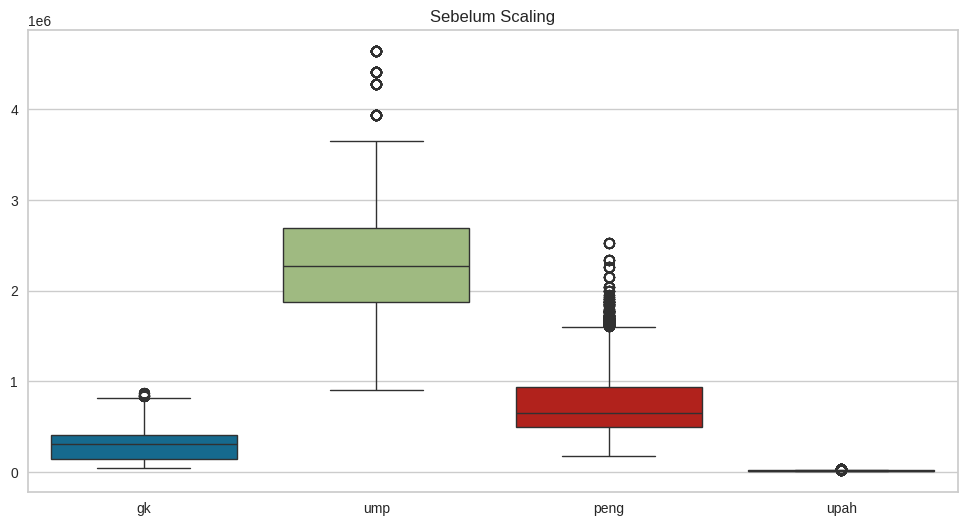

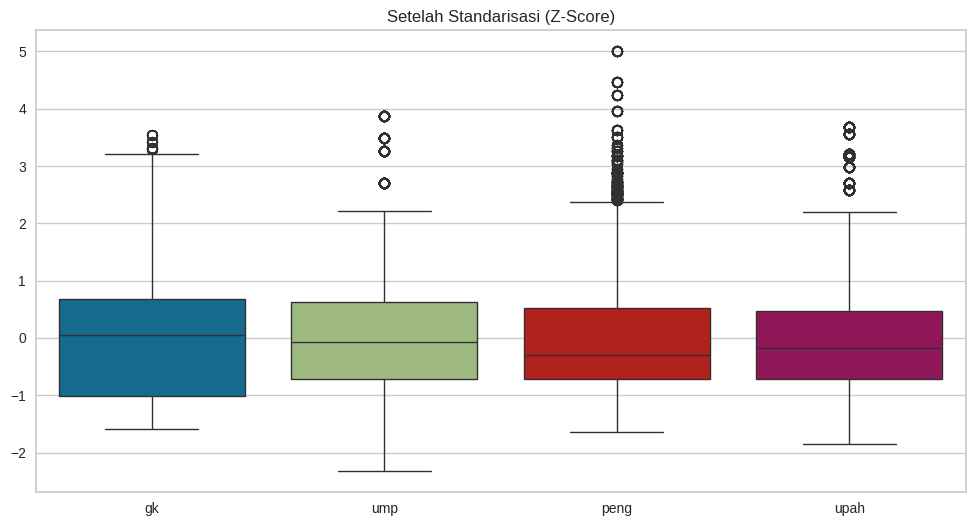

In [28]:
# Sebelum scaling
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_numerik)
plt.title('Sebelum Scaling')
plt.show()

# Sesudah standarisasi
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_standardized)
plt.title('Setelah Standarisasi (Z-Score)')
plt.show()

In [29]:
#4 Deteksi dan Penanganan Outlier

# Identifikasi kolom gk
Q1 = df1['gk'].quantile(0.25)
Q3 = df1['gk'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df1[(df1['gk'] < lower_bound) | (df1['gk'] > upper_bound)]
print(f"Jumlah outlier dalam 'gk': {len(outliers)}")

Jumlah outlier dalam 'gk': 9


In [30]:
# Identifikasi kolom ump
Q1 = df2['ump'].quantile(0.25)
Q3 = df2['ump'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df2[(df2['ump'] < lower_bound) | (df2['ump'] > upper_bound)]
print(f"Jumlah outlier dalam 'ump': {len(outliers)}")

Jumlah outlier dalam 'ump': 3


In [31]:
# Identifikasi kolom peng
Q1 = df3['peng'].quantile(0.25)
Q3 = df3['peng'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df3[(df3['peng'] < lower_bound) | (df3['peng'] > upper_bound)]
print(f"Jumlah outlier dalam 'peng': {len(outliers)}")

Jumlah outlier dalam 'peng': 210


In [32]:
# Identifikasi kolom upah
Q1 = df4['upah'].quantile(0.25)
Q3 = df4['upah'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df4[(df4['upah'] < lower_bound) | (df4['upah'] > upper_bound)]
print(f"Jumlah outlier dalam 'upah': {len(outliers)}")

Jumlah outlier dalam 'upah': 7


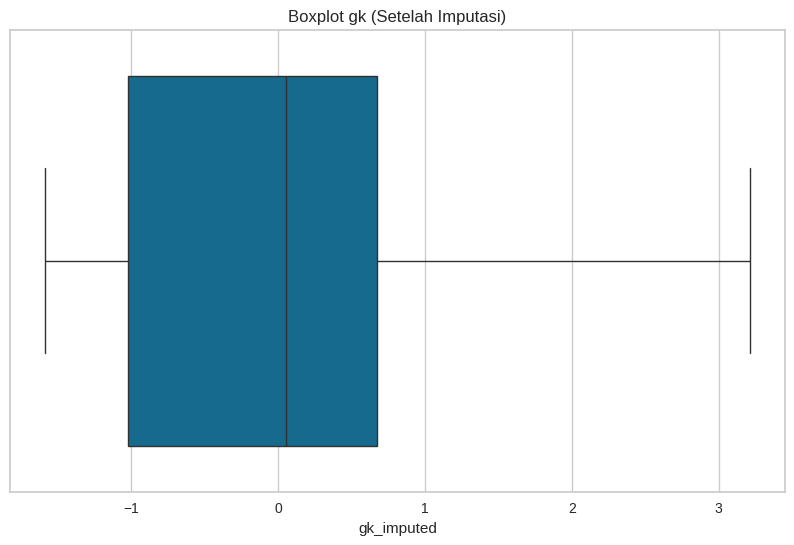

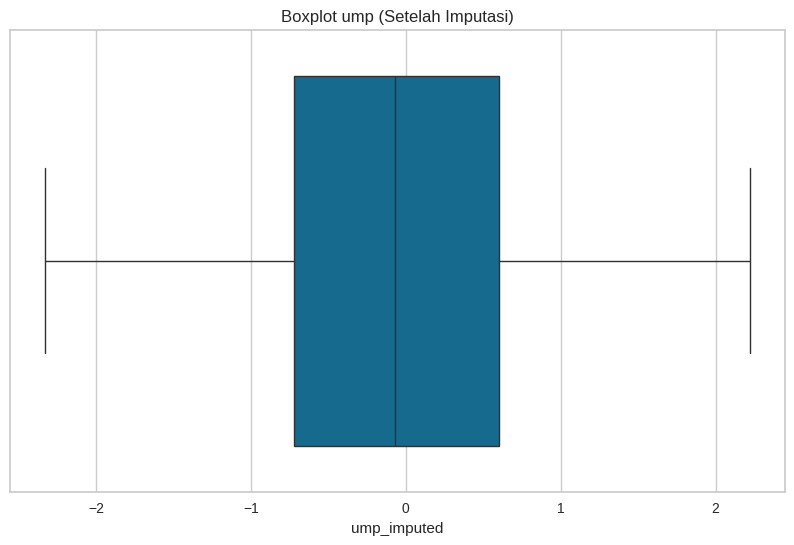

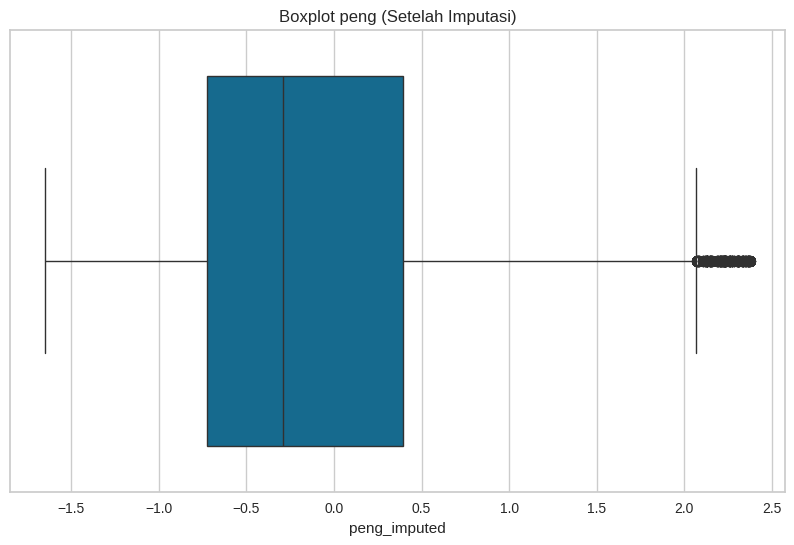

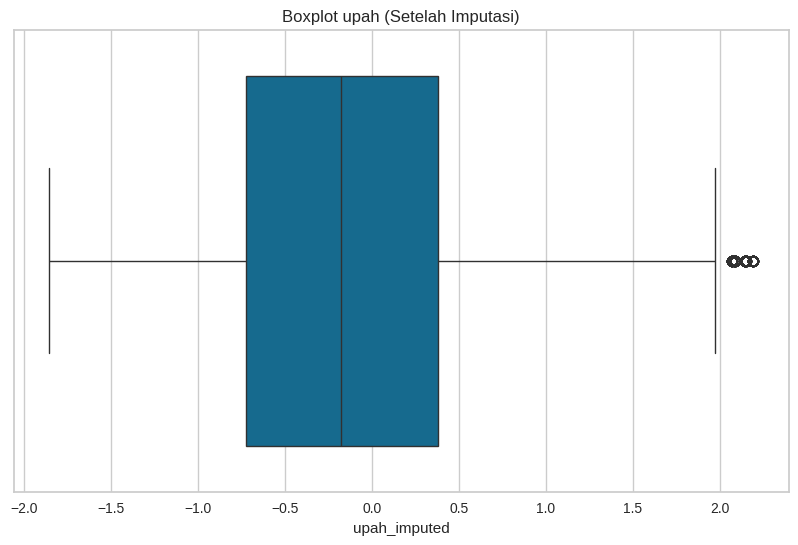

In [33]:
# Loop untuk semua kolom numerik
for col in numerical_cols:
    Q1 = df_merged[col].quantile(0.25)
    Q3 = df_merged[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ganti outlier dengan median
    median = df_merged[col].median()
    df_merged[f"{col}_imputed"] = df_merged[col].apply(
        lambda x: median if (x < lower_bound or x > upper_bound) else x
    )

    # Visualisasi
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_merged[f"{col}_imputed"])
    plt.title(f'Boxplot {col} (Setelah Imputasi)')
    plt.show()

In [34]:
#5 Encoding Data Kategorikal

# Label Encoding untuk kolom 'daerah'
label_encoder = LabelEncoder()
df1['daerah_encoded'] = label_encoder.fit_transform(df1['daerah'])
print(df1[['daerah', 'daerah_encoded']].head())

      daerah  daerah_encoded
0  PERKOTAAN               2
1  PERKOTAAN               2
2  PERKOTAAN               2
3  PERKOTAAN               2
4  PERDESAAN               0


In [35]:
# One Hot Encoding untuk kolom 'jenis'
df_encoded = pd.get_dummies(df1, columns=['jenis'], prefix=['jenis'])
print(df_encoded.head())

  provinsi     daerah  tahun    periode        gk  daerah_encoded  \
0     ACEH  PERKOTAAN   2015      MARET  293697.0               2   
1     ACEH  PERKOTAAN   2015  SEPTEMBER  302128.0               2   
2     ACEH  PERKOTAAN   2016      MARET  306243.0               2   
3     ACEH  PERKOTAAN   2016  SEPTEMBER  319768.0               2   
4     ACEH  PERDESAAN   2015      MARET  297479.0               0   

   jenis_MAKANAN  jenis_NONMAKANAN  jenis_TOTAL  
0           True             False        False  
1           True             False        False  
2           True             False        False  
3           True             False        False  
4           True             False        False  


In [36]:
# Target Encoding untuk kolom provinsi
# Hitung rata-rata 'gk' per provinsi
provinsi_target_mean = df1.groupby('provinsi')['gk'].mean().to_dict()

# Tampilkan contoh hasil
print("Contoh Mapping Provinsi ke Rata-rata GK:")
for prov, mean_gk in list(provinsi_target_mean.items())[:5]:  # Tampilkan 5 contoh
    print(f"{prov}: {mean_gk:.2f}")

Contoh Mapping Provinsi ke Rata-rata GK:
ACEH: 328149.13
BALI: 267254.52
BANTEN: 299750.88
BENGKULU: 334965.16
DI YOGYAKARTA: 280925.80


In [37]:
# Buat kolom baru 'provinsi_encoded'
df1['provinsi_encoded'] = df1['provinsi'].map(provinsi_target_mean)

# Tampilkan hasil
print(df1[['provinsi', 'gk', 'provinsi_encoded']].head())

print("------------------------------------------------------")

scaler = StandardScaler()
df1['provinsi_encoded_scaled'] = scaler.fit_transform(df1[['provinsi_encoded']])

# Tampilkan hasil
print(df1[['provinsi', 'provinsi_encoded', 'provinsi_encoded_scaled']].head())

  provinsi        gk  provinsi_encoded
0     ACEH  293697.0     328149.132962
1     ACEH  302128.0     328149.132962
2     ACEH  306243.0     328149.132962
3     ACEH  319768.0     328149.132962
4     ACEH  297479.0     328149.132962
------------------------------------------------------
  provinsi  provinsi_encoded  provinsi_encoded_scaled
0     ACEH     328149.132962                  0.44245
1     ACEH     328149.132962                  0.44245
2     ACEH     328149.132962                  0.44245
3     ACEH     328149.132962                  0.44245
4     ACEH     328149.132962                  0.44245


In [38]:
# Cycling Encoding untuk kolom periode

# Map bulan ke numerik
bulan_map = {'MARET': 3, 'SEPTEMBER': 9}
df1['periode_numeric'] = df1['periode'].map(bulan_map)

#  Hitung sin-cos
df1['periode_sin'] = np.sin(2 * np.pi * df1['periode_numeric'] / 12)
df1['periode_cos'] = np.cos(2 * np.pi * df1['periode_numeric'] / 12)


print(df1[['periode', 'periode_numeric', 'periode_sin', 'periode_cos']].head())

     periode  periode_numeric  periode_sin   periode_cos
0      MARET                3          1.0  6.123234e-17
1  SEPTEMBER                9         -1.0 -1.836970e-16
2      MARET                3          1.0  6.123234e-17
3  SEPTEMBER                9         -1.0 -1.836970e-16
4      MARET                3          1.0  6.123234e-17


In [39]:
#6 Binning
# Equal - Width Binning untuk gk

# Definisikan bins dan labels
bins_gk = [0, 200000, 400000, 600000, np.inf]
labels_gk = ['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi']

# Buat kolom baru
df1['gk_binned'] = pd.cut(df1['gk'], bins=bins_gk, labels=labels_gk)

# Hitung frekuensi
print(df1['gk_binned'].value_counts())

gk_binned
Rendah           2416
Sangat Rendah    1603
Sedang           1252
Tinggi            189
Name: count, dtype: int64


In [40]:
# Quantil Binning untuk ump
df2['ump_binned'] = pd.qcut(df2['ump'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Hitung frekuensi
print(df2['ump_binned'].value_counts())

ump_binned
Q1    184
Q2    184
Q4    184
Q3    183
Name: count, dtype: int64


In [41]:
# Custom Binning untuk peng
bins_peng = [0, 100000, 300000, 500000, np.inf]
labels_peng = ['Low', 'Medium', 'High', 'Very High']

df3['peng_binned'] = pd.cut(df3['peng'], bins=bins_peng, labels=labels_peng)

In [42]:
# Log binning untuk upah
log_bins = np.logspace(
    start=np.log10(df4['upah'].min()),
    stop=np.log10(df4['upah'].max()),
    num=5
)
df4['upah_binned'] = pd.cut(df4['upah'], bins=log_bins, labels=['A', 'B', 'C', 'D'])

In [43]:
# Menggabungkan semua hasil binning
df_final = pd.concat([
    df1[['provinsi', 'tahun', 'gk_binned']],
    df2[['provinsi', 'tahun', 'ump_binned']],
    df3[['provinsi', 'tahun', 'peng_binned']],
    df4[['provinsi', 'tahun', 'upah_binned']]
], axis=1)

# Simpan ke CSV
df_final.to_csv('data_binned.csv', index=False)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [44]:
# Load data (sesuaikan dengan path file Anda)
df = pd.read_csv('data_binned.csv')  # Ganti dengan nama file sebenarnya

# Cek 5 baris pertama
print("Preview Data:")
print(df.head())

# Pisahkan fitur numerik
numerical_cols = ['gk_binned', 'ump_binned', 'peng_binned', 'upah_binned']
X = df[numerical_cols]

Preview Data:
  provinsi  tahun gk_binned provinsi.1  tahun.1 ump_binned provinsi.2  \
0     ACEH   2015    Rendah       ACEH   2002.0         Q1       ACEH   
1     ACEH   2015    Rendah       ACEH   2003.0         Q1       ACEH   
2     ACEH   2016    Rendah       ACEH   2004.0         Q1       ACEH   
3     ACEH   2016    Rendah       ACEH   2005.0         Q1       ACEH   
4     ACEH   2015    Rendah       ACEH   2006.0         Q2       ACEH   

   tahun.2 peng_binned provinsi.3  tahun.3 upah_binned  
0   2007.0      Medium       ACEH   2015.0           A  
1   2008.0      Medium       ACEH   2016.0           B  
2   2009.0      Medium       ACEH   2017.0           B  
3   2010.0      Medium       ACEH   2018.0           B  
4   2011.0        High       ACEH   2019.0           B  


In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method untuk menentukan jumlah cluster
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

ValueError: could not convert string to float: 'Rendah'

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.